<a href="https://colab.research.google.com/github/nivedkm101/Exploratory_Data_Analysis_Task5/blob/main/Exploratory_Data_Analysis_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files;
uploaded = files.upload();

Saving train.csv to train.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/train.csv')

In [8]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df['Family_size'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp','Parch','Cabin','Ticket'], inplace=True)

In [16]:
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

df.tail()

,passengerid,survived,pclass,name,sex,age,fare,embarked,family_size
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.00,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.00,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.45,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,7.75,Q,0


In [19]:
df.head()

,passengerid,survived,pclass,name,sex,age,fare,embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


In [20]:
%matplotlib inline
sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (10,6)

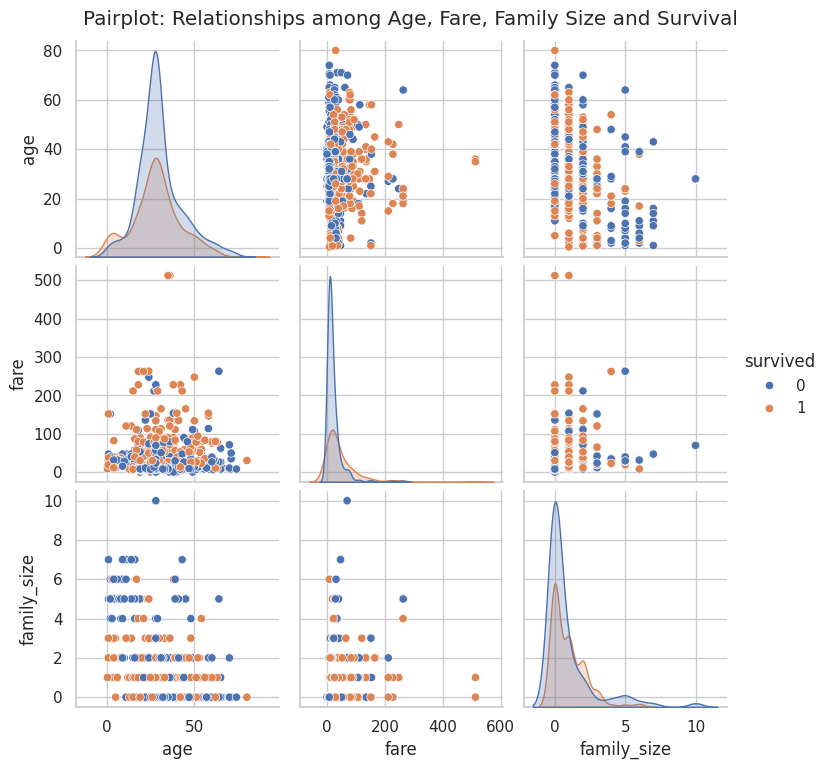

In [24]:
sns.pairplot(df[['survived','age','fare','family_size']],hue='survived')
plt.suptitle("Pairplot: Relationships among Age, Fare, Family Size and Survival", y=1.02)
plt.show()

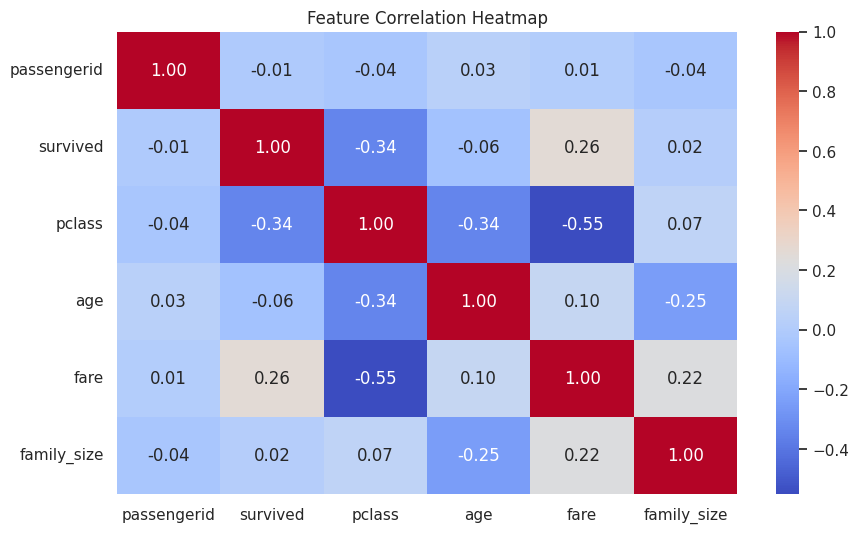

In [26]:
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [34]:
print(df['sex'].value_counts())


survival_rate_by_sex = df.groupby('sex')['survived'].mean() * 100
print(survival_rate_by_sex)


sex
male      577
female    314
Name: count, dtype: int64
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


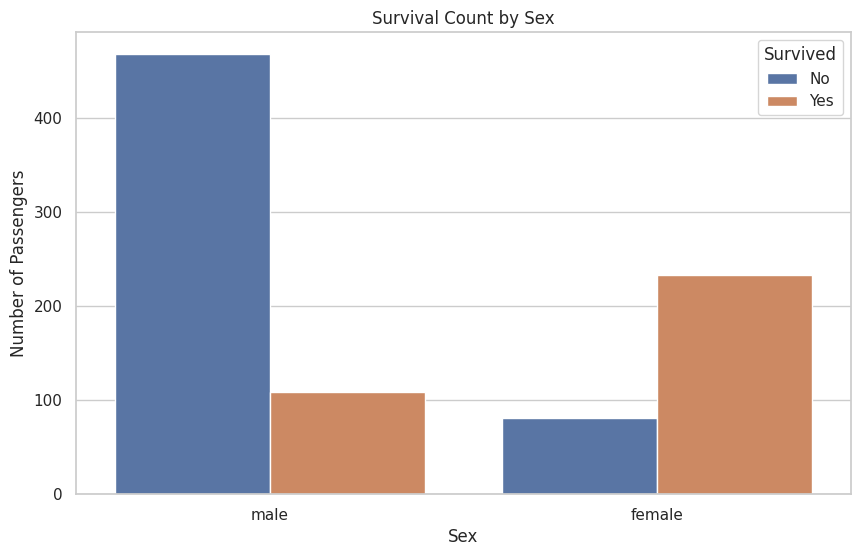

In [30]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


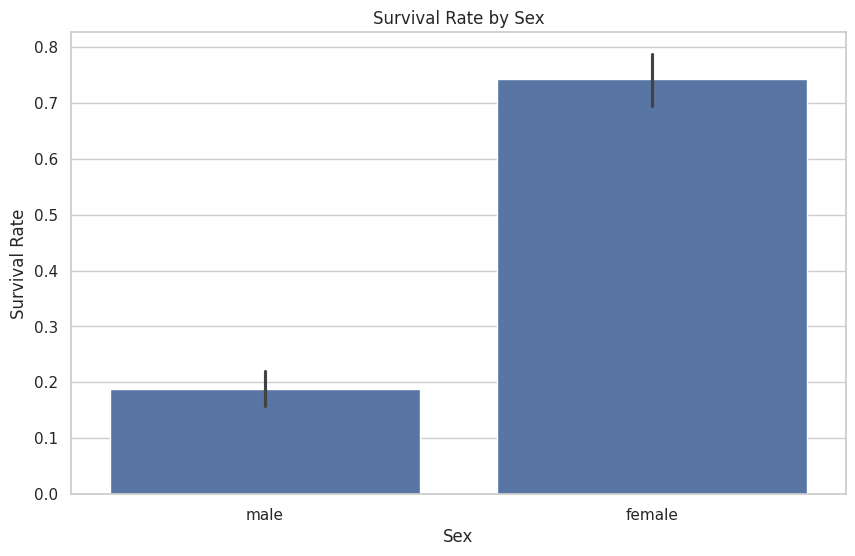

In [35]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

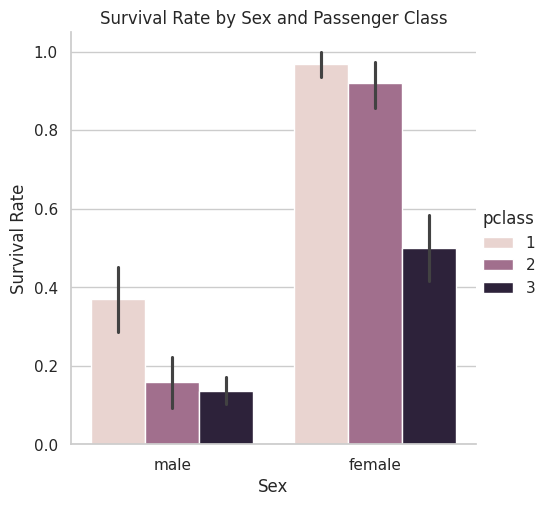

In [38]:
sns.catplot(x='sex', y='survived', hue='pclass', kind='bar', data=df)
plt.title("Survival Rate by Sex and Passenger Class")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

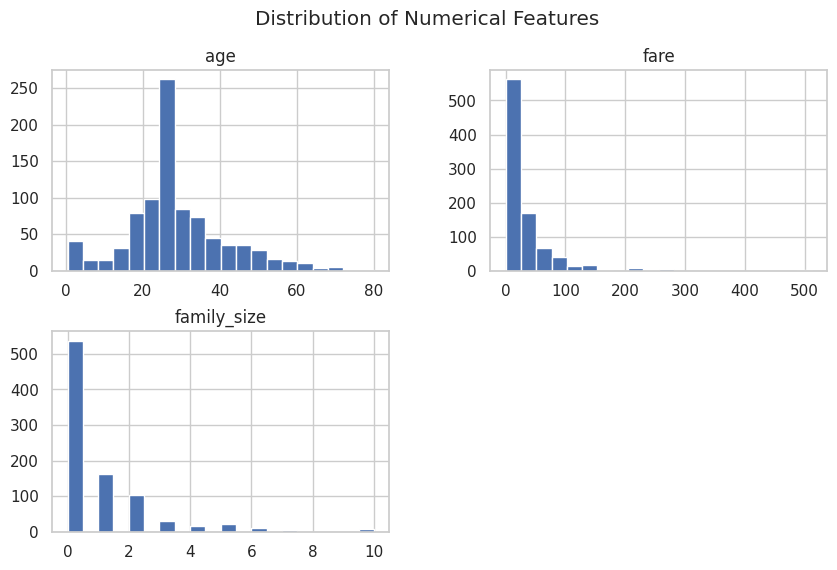

In [43]:
df[['age','fare','family_size']].hist(bins=20, figsize=(10,6))
plt.suptitle("Distribution of Numerical Features")
plt.show()

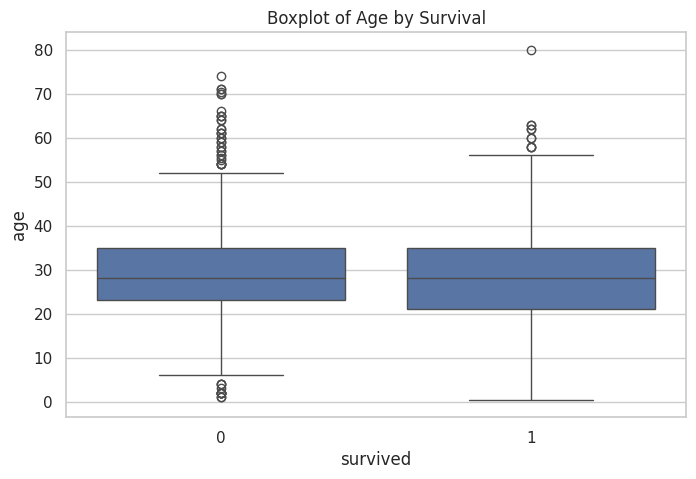

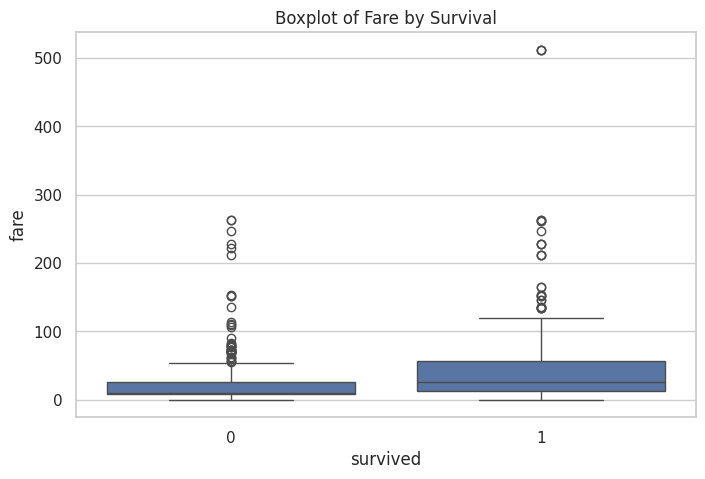

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x='survived', y='age', data=df)
plt.title("Boxplot of Age by Survival")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Boxplot of Fare by Survival")
plt.show()


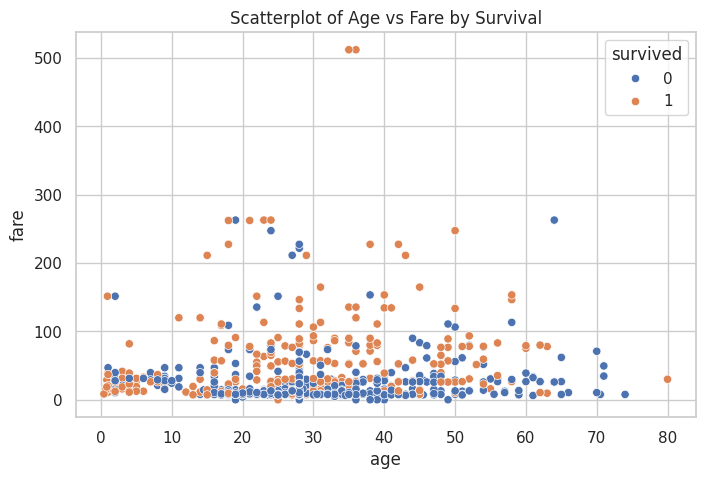

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Scatterplot of Age vs Fare by Survival")
plt.show()


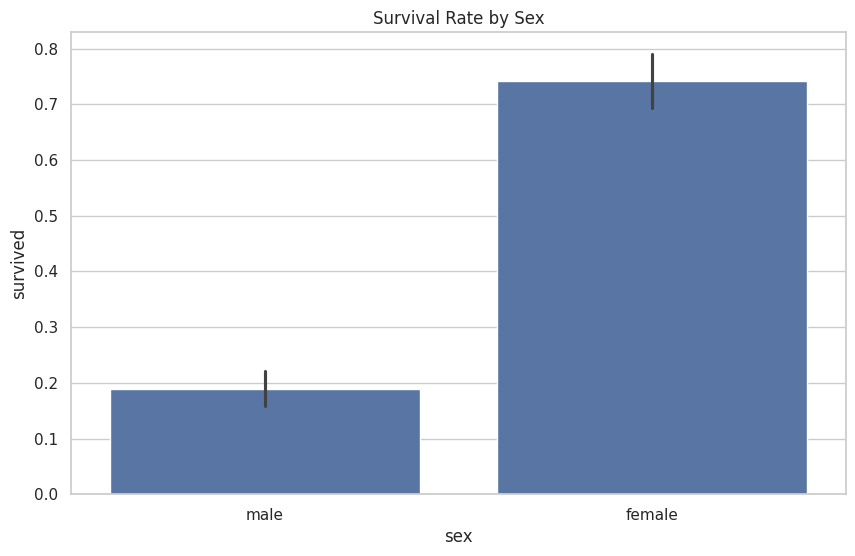

In [61]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()



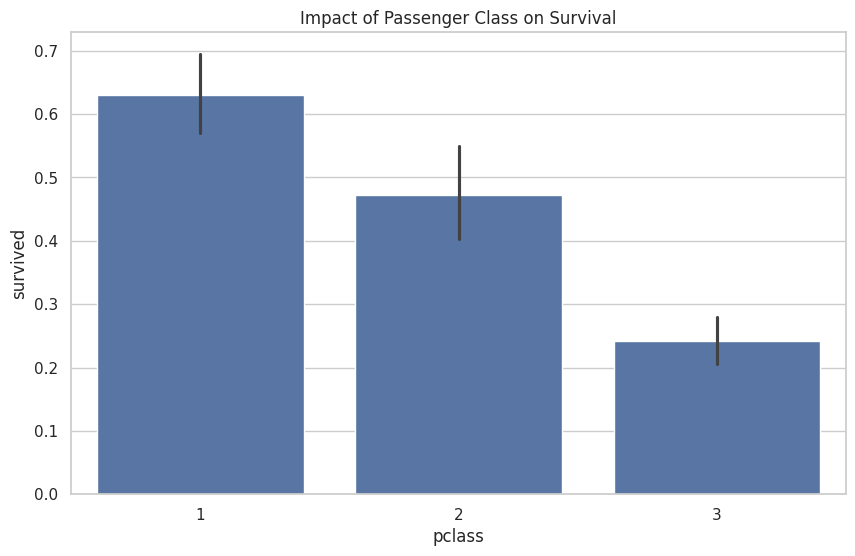

In [63]:

sns.barplot(x='pclass', y='survived', data=df)
plt.title("Impact of Passenger Class on Survival")
plt.show()

In [64]:
df.to_csv("Titanic_cleanned_task5",index=False)